In [92]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(7, 7)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [93]:
import re

semua_kalimat = []
f = open('coba.txt')

kalimat = []
for sentence in f:
    tokens = re.sub(r"[^a-z0-9]+", " ", sentence.lower()).split()
    kalimat.append(tokens)
print(kalimat)

[['aku', 'dia']]


In [102]:
from gensim.models import Word2Vec
myModel = Word2Vec(sentences=kalimat, size=2, window=2, min_count=1, workers=4, sg=1)
myModel.save('model.bin')

In [95]:
from gensim.models import Word2Vec
myModel = Word2Vec.load('model.bin')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


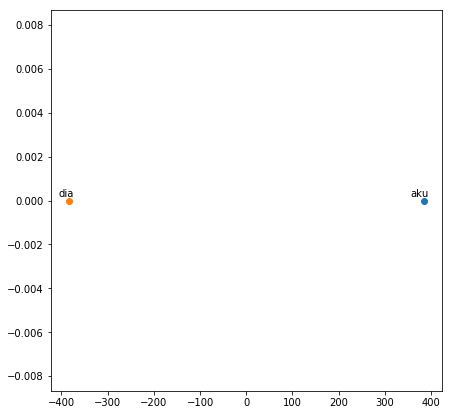

In [96]:
tsne_plot(myModel)

In [97]:
# for kata in myModel.wv.most_similar('cinta'):
#     print(kata)

In [98]:
print(myModel.wv['aku'])
print(myModel.wv['dia'])

[ 0.1325646 -0.1914142]
[-0.107014   -0.02351297]


In [99]:
print(myModel.wv['aku'])

[ 0.1325646 -0.1914142]
